In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base() 

# reflect the tables
Base.prepare(engine, reflect=True) 

In [6]:
# View all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station 

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
max_date_str = session.query(func.max(Measurement.date)).all()[0][0]
max_date_str

'2017-08-23'

In [141]:
# Calculate the date one year from the last date in data set.
max_date = dt.datetime.fromisoformat(max_date_str).date()
year_date_down = max_date - dt.timedelta(days=365)
year_date_down

datetime.date(2016, 8, 23)

In [171]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= max_date_str).\
    filter(Measurement.date >= year_date_down).all()
prcp_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [178]:
prcp_data_df = pd.DataFrame(prcp_data)
prcp_data_df

# i_prcp_data_df = prcp_data_df.set_index(list(prcp_data_df.columns[[0,1]]))
# i_prcp_data_df

,0,1
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [183]:
# Sort the dataframe by date

sorted_prcp_data_df = i_prcp_data_df.sort_values(by= [0])

sorted_prcp_data_df

Empty DataFrame
Columns: []
Index: [(2016-08-23, 0.0), (2016-08-23, nan), (2016-08-23, 1.79), (2016-08-23, 0.05), (2016-08-23, 0.15), (2016-08-23, 0.7), (2016-08-23, 0.02), (2016-08-24, 0.08), (2016-08-24, 2.15), (2016-08-24, 2.28), (2016-08-24, nan), (2016-08-24, 1.45), (2016-08-24, 1.22), (2016-08-24, 2.15), (2016-08-25, 0.08), (2016-08-25, 0.0), (2016-08-25, 0.21), (2016-08-25, 0.06), (2016-08-25, 0.0), (2016-08-25, 0.11), (2016-08-25, 0.08), (2016-08-26, 0.03), (2016-08-26, 0.01), (2016-08-26, 0.0), (2016-08-26, 0.04), (2016-08-26, 0.02), (2016-08-26, 0.0), (2016-08-27, 0.18), (2016-08-27, 0.12), (2016-08-27, 0.0), (2016-08-27, 0.0), (2016-08-27, 0.02), (2016-08-27, nan), (2016-08-28, 0.6), (2016-08-28, 0.14), (2016-08-28, 0.01), (2016-08-28, 0.14), (2016-08-28, 0.14), (2016-08-28, 2.07), (2016-08-29, 0.0), (2016-08-29, nan), (2016-08-29, 0.04), (2016-08-29, 0.0), (2016-08-29, 0.17), (2016-08-29, 0.9), (2016-08-29, 0.35), (2016-08-30, 0.0), (2016-08-30, 0.02), (2016-08-30, 0.0), (2016-08-30, 0.05), (2016-08-30, 0.0), (2016-08-30, 0.0), (2016-08-31, 0.1), (2016-08-31, nan), (2016-08-31, 0.24), (2016-08-31, 0.13), (2016-08-31, nan), (2016-08-31, 2.46), (2016-08-31, 0.25), (2016-09-01, 0.0), (2016-09-01, 0.02), (2016-09-01, 0.0), (2016-09-01, nan), (2016-09-01, 0.01), (2016-09-01, 0.0), (2016-09-02, 0.0), (2016-09-02, 0.03), (2016-09-02, 0.02), (2016-09-02, nan), (2016-09-02, nan), (2016-09-02, 0.01), (2016-09-02, 0.19), (2016-09-03, 1.0), (2016-09-03, 0.08), (2016-09-03, 0.12), (2016-09-03, 0.0), (2016-09-03, 0.07), (2016-09-04, 0.03), (2016-09-04, 0.14), (2016-09-04, 0.74), (2016-09-04, 0.03), (2016-09-04, 0.44), (2016-09-05, 0.02), (2016-09-05, 0.03), (2016-09-05, 0.11), (2016-09-05, nan), (2016-09-05, nan), (2016-09-05, 0.18), (2016-09-06, nan), (2016-09-06, 0.05), (2016-09-06, 0.03), (2016-09-06, 1.0), (2016-09-06, 0.11), (2016-09-06, 0.04), (2016-09-07, 0.16), (2016-09-07, 0.05), (2016-09-07, 0.11), (2016-09-07, 0.1), (2016-09-07, 1.35), (2016-09-07, 0.23), ...]

[2230 rows x 0 columns]

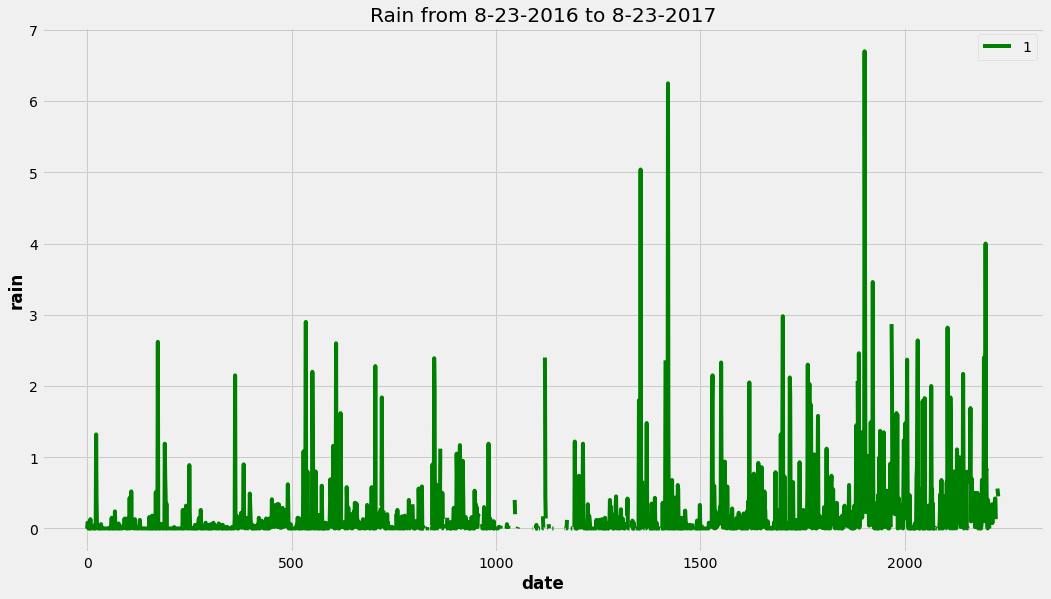

In [177]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = prcp_data_df.plot(figsize = (16, 9), use_index=True, legend=True, color='green')
plt.ylabel('rain', weight='bold')
plt.xlabel('date', weight='bold')
plt.title("Rain from 8-23-2016 to 8-23-2017")
plt.show()

In [184]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data_df.describe()

,1
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [185]:
# Design a query to calculate the total number stations in the dataset
station = session.query(Station.id).count()
station

9

In [186]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

high_row_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
high_row_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [187]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [196]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

highest_row_station_data =  session.query(Measurement.date,Measurement.tobs).\
                    filter(Measurement.station == 'USC00519281').\
                    filter(Measurement.date > year_date_down).all()
highest_row_station_data

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

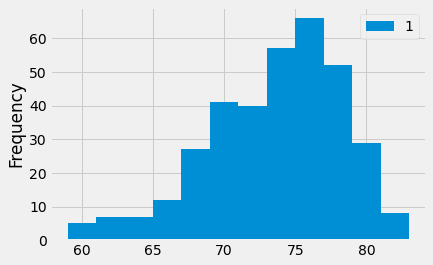

In [197]:
highest_row_station_df= pd.DataFrame(highest_row_station_data)
highest_row_station_df.plot(kind="hist",bins=12);

# Close session

In [198]:
# Close Session
session.close()